# Graphical analysis of the dataset
In this notebook we did a thorough analysis of the data from the Cleveland Clinic Heart Disease dataset, using a  widget for generating graphs and analyzing individual graphs and relationships between variables.


## Please run all the cells


## ENLACE Summer Research program Team #15


### Team members:


- **Kimberly Rodelo Mascareñas**
    - Biomedical Engineering student at Universidad La Salle
- **Juan Francisco Navarro Rodríguez**
    - Bioengineering student at Universidad Autónoma de Baja California
- **Dr. German Alonso Ruiz Domínguez**
    - Professor in Manufacturing at Instituto Tecnológico de Hermosillo
- **Daniela Abril López**
    - High school student at CETYS Bachillerato 
- **Santiago Makoszay Castañón**
    - High school student at Prepa Tec Campus Estado de México 

### Mentors


- **Sachin Govil**
    - Bioengineering PhD. Candidate at University of California, San Diego
        - Cardiac Biomechanics lab
- **Abigail Teitgen**
    - Bioengineering PhD. Candidate at University of California, San Diego
        - Cardiac Biomechanics lab


## Libraries, data and logic (this section can be kept hidden)

### Loading the basic libraries

In [1]:
%config InlineBackend.figure_format = 'svg'

import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import seaborn as sns


### Loading the database and displaying a slice of the data

We hardcoded the database so that there wouldnt be reliability issues

In [2]:
#@title Hardcoded csv database
## We hardcoded the database so that there wouldnt be reliability issues
data_string = """index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
8,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
10,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
11,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
12,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
13,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
14,44,1,2,120,263,0,0,173,0,0,1,0,7,0
15,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
16,57,1,3,150,168,0,0,174,0,1.6,1,0,3,0
17,48,1,2,110,229,0,0,168,0,1,3,0,7,1
18,54,1,4,140,239,0,0,160,0,1.2,1,0,3,0
19,48,0,3,130,275,0,0,139,0,0.2,1,0,3,0
20,49,1,2,130,266,0,0,171,0,0.6,1,0,3,0
21,64,1,1,110,211,0,2,144,1,1.8,2,0,3,0
22,58,0,1,150,283,1,2,162,0,1,1,0,3,0
23,58,1,2,120,284,0,2,160,0,1.8,2,0,3,1
24,58,1,3,132,224,0,2,173,0,3.2,1,2,7,3
25,60,1,4,130,206,0,2,132,1,2.4,2,2,7,4
26,50,0,3,120,219,0,0,158,0,1.6,2,0,3,0
27,58,0,3,120,340,0,0,172,0,0,1,0,3,0
28,66,0,1,150,226,0,0,114,0,2.6,3,0,3,0
29,43,1,4,150,247,0,0,171,0,1.5,1,0,3,0
30,40,1,4,110,167,0,2,114,1,2,2,0,7,3
31,69,0,1,140,239,0,0,151,0,1.8,1,2,3,0
32,60,1,4,117,230,1,0,160,1,1.4,1,2,7,2
33,64,1,3,140,335,0,0,158,0,0,1,0,3,1
34,59,1,4,135,234,0,0,161,0,0.5,2,0,7,0
35,44,1,3,130,233,0,0,179,1,0.4,1,0,3,0
36,42,1,4,140,226,0,0,178,0,0,1,0,3,0
37,43,1,4,120,177,0,2,120,1,2.5,2,0,7,3
38,57,1,4,150,276,0,2,112,1,0.6,2,1,6,1
39,55,1,4,132,353,0,0,132,1,1.2,2,1,7,3
40,61,1,3,150,243,1,0,137,1,1,2,0,3,0
41,65,0,4,150,225,0,2,114,0,1,2,3,7,4
42,40,1,1,140,199,0,0,178,1,1.4,1,0,7,0
43,71,0,2,160,302,0,0,162,0,0.4,1,2,3,0
44,59,1,3,150,212,1,0,157,0,1.6,1,0,3,0
45,61,0,4,130,330,0,2,169,0,0,1,0,3,1
46,58,1,3,112,230,0,2,165,0,2.5,2,1,7,4
47,51,1,3,110,175,0,0,123,0,0.6,1,0,3,0
48,50,1,4,150,243,0,2,128,0,2.6,2,0,7,4
49,65,0,3,140,417,1,2,157,0,0.8,1,1,3,0
50,53,1,3,130,197,1,2,152,0,1.2,3,0,3,0
51,41,0,2,105,198,0,0,168,0,0,1,1,3,0
52,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
53,44,1,4,112,290,0,2,153,0,0,1,1,3,2
54,44,1,2,130,219,0,2,188,0,0,1,0,3,0
55,60,1,4,130,253,0,0,144,1,1.4,1,1,7,1
56,54,1,4,124,266,0,2,109,1,2.2,2,1,7,1
57,50,1,3,140,233,0,0,163,0,0.6,2,1,7,1
58,41,1,4,110,172,0,2,158,0,0,1,0,7,1
59,54,1,3,125,273,0,2,152,0,0.5,3,1,3,0
60,51,1,1,125,213,0,2,125,1,1.4,1,1,3,0
61,51,0,4,130,305,0,0,142,1,1.2,2,0,7,2
62,46,0,3,142,177,0,2,160,1,1.4,3,0,3,0
63,58,1,4,128,216,0,2,131,1,2.2,2,3,7,1
64,54,0,3,135,304,1,0,170,0,0,1,0,3,0
65,54,1,4,120,188,0,0,113,0,1.4,2,1,7,2
66,60,1,4,145,282,0,2,142,1,2.8,2,2,7,2
67,60,1,3,140,185,0,2,155,0,3,2,0,3,1
68,54,1,3,150,232,0,2,165,0,1.6,1,0,7,0
69,59,1,4,170,326,0,2,140,1,3.4,3,0,7,2
70,46,1,3,150,231,0,0,147,0,3.6,2,0,3,1
71,65,0,3,155,269,0,0,148,0,0.8,1,0,3,0
72,67,1,4,125,254,1,0,163,0,0.2,2,2,7,3
73,62,1,4,120,267,0,0,99,1,1.8,2,2,7,1
74,65,1,4,110,248,0,2,158,0,0.6,1,2,6,1
75,44,1,4,110,197,0,2,177,0,0,1,1,3,1
76,65,0,3,160,360,0,2,151,0,0.8,1,0,3,0
77,60,1,4,125,258,0,2,141,1,2.8,2,1,7,1
78,51,0,3,140,308,0,2,142,0,1.5,1,1,3,0
79,48,1,2,130,245,0,2,180,0,0.2,2,0,3,0
80,58,1,4,150,270,0,2,111,1,0.8,1,0,7,3
81,45,1,4,104,208,0,2,148,1,3,2,0,3,0
82,53,0,4,130,264,0,2,143,0,0.4,2,0,3,0
83,39,1,3,140,321,0,2,182,0,0,1,0,3,0
84,68,1,3,180,274,1,2,150,1,1.6,2,0,7,3
85,52,1,2,120,325,0,0,172,0,0.2,1,0,3,0
86,44,1,3,140,235,0,2,180,0,0,1,0,3,0
87,47,1,3,138,257,0,2,156,0,0,1,0,3,0
88,53,0,4,138,234,0,2,160,0,0,1,0,3,0
89,51,0,3,130,256,0,2,149,0,0.5,1,0,3,0
90,66,1,4,120,302,0,2,151,0,0.4,2,0,3,0
91,62,0,4,160,164,0,2,145,0,6.2,3,3,7,3
92,62,1,3,130,231,0,0,146,0,1.8,2,3,7,0
93,44,0,3,108,141,0,0,175,0,0.6,2,0,3,0
94,63,0,3,135,252,0,2,172,0,0,1,0,3,0
95,52,1,4,128,255,0,0,161,1,0,1,1,7,1
96,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
97,60,0,4,150,258,0,2,157,0,2.6,2,2,7,3
98,52,1,2,134,201,0,0,158,0,0.8,1,1,3,0
99,48,1,4,122,222,0,2,186,0,0,1,0,3,0
100,45,1,4,115,260,0,2,185,0,0,1,0,3,0
101,34,1,1,118,182,0,2,174,0,0,1,0,3,0
102,57,0,4,128,303,0,2,159,0,0,1,1,3,0
103,71,0,3,110,265,1,2,130,0,0,1,1,3,0
104,49,1,3,120,188,0,0,139,0,2,2,3,7,3
105,54,1,2,108,309,0,0,156,0,0,1,0,7,0
106,59,1,4,140,177,0,0,162,1,0,1,1,7,2
107,57,1,3,128,229,0,2,150,0,0.4,2,1,7,1
108,61,1,4,120,260,0,0,140,1,3.6,2,1,7,2
109,39,1,4,118,219,0,0,140,0,1.2,2,0,7,3
110,61,0,4,145,307,0,2,146,1,1,2,0,7,1
111,56,1,4,125,249,1,2,144,1,1.2,2,1,3,1
112,52,1,1,118,186,0,2,190,0,0,2,0,6,0
113,43,0,4,132,341,1,2,136,1,3,2,0,7,2
114,62,0,3,130,263,0,0,97,0,1.2,2,1,7,2
115,41,1,2,135,203,0,0,132,0,0,2,0,6,0
116,58,1,3,140,211,1,2,165,0,0,1,0,3,0
117,35,0,4,138,183,0,0,182,0,1.4,1,0,3,0
118,63,1,4,130,330,1,2,132,1,1.8,1,3,7,3
119,65,1,4,135,254,0,2,127,0,2.8,2,1,7,2
120,48,1,4,130,256,1,2,150,1,0,1,2,7,3
121,63,0,4,150,407,0,2,154,0,4,2,3,7,4
122,51,1,3,100,222,0,0,143,1,1.2,2,0,3,0
123,55,1,4,140,217,0,0,111,1,5.6,3,0,7,3
124,65,1,1,138,282,1,2,174,0,1.4,2,1,3,1
125,45,0,2,130,234,0,2,175,0,0.6,2,0,3,0
126,56,0,4,200,288,1,2,133,1,4,3,2,7,3
127,54,1,4,110,239,0,0,126,1,2.8,2,1,7,3
128,44,1,2,120,220,0,0,170,0,0,1,0,3,0
129,62,0,4,124,209,0,0,163,0,0,1,0,3,0
130,54,1,3,120,258,0,2,147,0,0.4,2,0,7,0
131,51,1,3,94,227,0,0,154,1,0,1,1,7,0
132,29,1,2,130,204,0,2,202,0,0,1,0,3,0
133,51,1,4,140,261,0,2,186,1,0,1,0,3,0
134,43,0,3,122,213,0,0,165,0,0.2,2,0,3,0
135,55,0,2,135,250,0,2,161,0,1.4,2,0,3,0
136,70,1,4,145,174,0,0,125,1,2.6,3,0,7,4
137,62,1,2,120,281,0,2,103,0,1.4,2,1,7,3
138,35,1,4,120,198,0,0,130,1,1.6,2,0,7,1
139,51,1,3,125,245,1,2,166,0,2.4,2,0,3,0
140,59,1,2,140,221,0,0,164,1,0,1,0,3,0
141,59,1,1,170,288,0,2,159,0,0.2,2,0,7,1
142,52,1,2,128,205,1,0,184,0,0,1,0,3,0
143,64,1,3,125,309,0,0,131,1,1.8,2,0,7,1
144,58,1,3,105,240,0,2,154,1,0.6,2,0,7,0
145,47,1,3,108,243,0,0,152,0,0,1,0,3,1
146,57,1,4,165,289,1,2,124,0,1,2,3,7,4
147,41,1,3,112,250,0,0,179,0,0,1,0,3,0
148,45,1,2,128,308,0,2,170,0,0,1,0,3,0
149,60,0,3,102,318,0,0,160,0,0,1,1,3,0
150,52,1,1,152,298,1,0,178,0,1.2,2,0,7,0
151,42,0,4,102,265,0,2,122,0,0.6,2,0,3,0
152,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
153,55,1,4,160,289,0,2,145,1,0.8,2,1,7,4
154,64,1,4,120,246,0,2,96,1,2.2,3,1,3,3
155,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
156,51,1,4,140,299,0,0,173,1,1.6,1,0,7,1
157,58,1,4,125,300,0,2,171,0,0,1,2,7,1
158,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
159,68,1,3,118,277,0,0,151,0,1,1,1,7,0
160,46,1,2,101,197,1,0,156,0,0,1,0,7,0
161,77,1,4,125,304,0,2,162,1,0,1,3,3,4
162,54,0,3,110,214,0,0,158,0,1.6,2,0,3,0
163,58,0,4,100,248,0,2,122,0,1,2,0,3,0
164,48,1,3,124,255,1,0,175,0,0,1,2,3,0
165,57,1,4,132,207,0,0,168,1,0,1,0,7,0
166,54,0,2,132,288,1,2,159,1,0,1,1,3,0
167,35,1,4,126,282,0,2,156,1,0,1,0,7,1
168,45,0,2,112,160,0,0,138,0,0,2,0,3,0
169,70,1,3,160,269,0,0,112,1,2.9,2,1,7,3
170,53,1,4,142,226,0,2,111,1,0,1,0,7,0
171,59,0,4,174,249,0,0,143,1,0,2,0,3,1
172,62,0,4,140,394,0,2,157,0,1.2,2,0,3,0
173,64,1,4,145,212,0,2,132,0,2,2,2,6,4
174,57,1,4,152,274,0,0,88,1,1.2,2,1,7,1
175,52,1,4,108,233,1,0,147,0,0.1,1,3,7,0
176,56,1,4,132,184,0,2,105,1,2.1,2,1,6,1
177,43,1,3,130,315,0,0,162,0,1.9,1,1,3,0
178,53,1,3,130,246,1,2,173,0,0,1,3,3,0
179,48,1,4,124,274,0,2,166,0,0.5,2,0,7,3
180,56,0,4,134,409,0,2,150,1,1.9,2,2,7,2
181,42,1,1,148,244,0,2,178,0,0.8,1,2,3,0
182,59,1,1,178,270,0,2,145,0,4.2,3,0,7,0
183,60,0,4,158,305,0,2,161,0,0,1,0,3,1
184,63,0,2,140,195,0,0,179,0,0,1,2,3,0
185,42,1,3,120,240,1,0,194,0,0.8,3,0,7,0
186,66,1,2,160,246,0,0,120,1,0,2,3,6,2
187,54,1,2,192,283,0,2,195,0,0,1,1,7,1
188,69,1,3,140,254,0,2,146,0,2,2,3,7,2
189,50,1,3,129,196,0,0,163,0,0,1,0,3,0
190,51,1,4,140,298,0,0,122,1,4.2,2,3,7,3
191,62,0,4,138,294,1,0,106,0,1.9,2,3,3,2
192,68,0,3,120,211,0,2,115,0,1.5,2,0,3,0
193,67,1,4,100,299,0,2,125,1,0.9,2,2,3,3
194,69,1,1,160,234,1,2,131,0,0.1,2,1,3,0
195,45,0,4,138,236,0,2,152,1,0.2,2,0,3,0
196,50,0,2,120,244,0,0,162,0,1.1,1,0,3,0
197,59,1,1,160,273,0,2,125,0,0,1,0,3,1
198,50,0,4,110,254,0,2,159,0,0,1,0,3,0
199,64,0,4,180,325,0,0,154,1,0,1,0,3,0
200,57,1,3,150,126,1,0,173,0,0.2,1,1,7,0
201,64,0,3,140,313,0,0,133,0,0.2,1,0,7,0
202,43,1,4,110,211,0,0,161,0,0,1,0,7,0
203,45,1,4,142,309,0,2,147,1,0,2,3,7,3
204,58,1,4,128,259,0,2,130,1,3,2,2,7,3
205,50,1,4,144,200,0,2,126,1,0.9,2,0,7,3
206,55,1,2,130,262,0,0,155,0,0,1,0,3,0
207,62,0,4,150,244,0,0,154,1,1.4,2,0,3,1
208,37,0,3,120,215,0,0,170,0,0,1,0,3,0
209,38,1,1,120,231,0,0,182,1,3.8,2,0,7,4
210,41,1,3,130,214,0,2,168,0,2,2,0,3,0
211,66,0,4,178,228,1,0,165,1,1,2,2,7,3
212,52,1,4,112,230,0,0,160,0,0,1,1,3,1
213,56,1,1,120,193,0,2,162,0,1.9,2,0,7,0
214,46,0,2,105,204,0,0,172,0,0,1,0,3,0
215,46,0,4,138,243,0,2,152,1,0,2,0,3,0
216,64,0,4,130,303,0,0,122,0,2,2,2,3,0
217,59,1,4,138,271,0,2,182,0,0,1,0,3,0
218,41,0,3,112,268,0,2,172,1,0,1,0,3,0
219,54,0,3,108,267,0,2,167,0,0,1,0,3,0
220,39,0,3,94,199,0,0,179,0,0,1,0,3,0
221,53,1,4,123,282,0,0,95,1,2,2,2,7,3
222,63,0,4,108,269,0,0,169,1,1.8,2,2,3,1
223,34,0,2,118,210,0,0,192,0,0.7,1,0,3,0
224,47,1,4,112,204,0,0,143,0,0.1,1,0,3,0
225,67,0,3,152,277,0,0,172,0,0,1,1,3,0
226,54,1,4,110,206,0,2,108,1,0,2,1,3,3
227,66,1,4,112,212,0,2,132,1,0.1,1,1,3,2
228,52,0,3,136,196,0,2,169,0,0.1,2,0,3,0
229,55,0,4,180,327,0,1,117,1,3.4,2,0,3,2
230,49,1,3,118,149,0,2,126,0,0.8,1,3,3,1
231,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
232,54,0,3,160,201,0,0,163,0,0,1,1,3,0
233,54,1,4,122,286,0,2,116,1,3.2,2,2,3,3
234,56,1,4,130,283,1,2,103,1,1.6,3,0,7,2
235,46,1,4,120,249,0,2,144,0,0.8,1,0,7,1
236,49,0,2,134,271,0,0,162,0,0,2,0,3,0
237,42,1,2,120,295,0,0,162,0,0,1,0,3,0
238,41,1,2,110,235,0,0,153,0,0,1,0,3,0
239,41,0,2,126,306,0,0,163,0,0,1,0,3,0
240,49,0,4,130,269,0,0,163,0,0,1,0,3,0
241,61,1,1,134,234,0,0,145,0,2.6,2,2,3,2
242,60,0,3,120,178,1,0,96,0,0,1,0,3,0
243,67,1,4,120,237,0,0,71,0,1,2,0,3,2
244,58,1,4,100,234,0,0,156,0,0.1,1,1,7,2
245,47,1,4,110,275,0,2,118,1,1,2,1,3,1
246,52,1,4,125,212,0,0,168,0,1,1,2,7,3
247,62,1,2,128,208,1,2,140,0,0,1,0,3,0
248,57,1,4,110,201,0,0,126,1,1.5,2,0,6,0
249,58,1,4,146,218,0,0,105,0,2,2,1,7,1
250,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
251,51,0,3,120,295,0,2,157,0,0.6,1,0,3,0
252,43,1,4,115,303,0,0,181,0,1.2,2,0,3,0
253,42,0,3,120,209,0,0,173,0,0,2,0,3,0
254,67,0,4,106,223,0,0,142,0,0.3,1,2,3,0
255,76,0,3,140,197,0,1,116,0,1.1,2,0,3,0
256,70,1,2,156,245,0,2,143,0,0,1,0,3,0
257,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
258,44,0,3,118,242,0,0,149,0,0.3,2,1,3,0
259,58,0,2,136,319,1,2,152,0,0,1,2,3,3
260,60,0,1,150,240,0,0,171,0,0.9,1,0,3,0
261,44,1,3,120,226,0,0,169,0,0,1,0,3,0
262,61,1,4,138,166,0,2,125,1,3.6,2,1,3,4
263,42,1,4,136,315,0,0,125,1,1.8,2,0,6,2
264,59,1,3,126,218,1,0,134,0,2.2,2,1,6,2
265,40,1,4,152,223,0,0,181,0,0,1,0,7,1
266,42,1,3,130,180,0,0,150,0,0,1,0,3,0
267,61,1,4,140,207,0,2,138,1,1.9,1,1,7,1
268,66,1,4,160,228,0,2,138,0,2.3,1,0,6,0
269,46,1,4,140,311,0,0,120,1,1.8,2,2,7,2
270,71,0,4,112,149,0,0,125,0,1.6,2,0,3,0
271,59,1,1,134,204,0,0,162,0,0.8,1,2,3,1
272,64,1,1,170,227,0,2,155,0,0.6,2,0,7,0
273,66,0,3,146,278,0,2,152,0,0,2,1,3,0
274,39,0,3,138,220,0,0,152,0,0,2,0,3,0
275,57,1,2,154,232,0,2,164,0,0,1,1,3,1
276,58,0,4,130,197,0,0,131,0,0.6,2,0,3,0
277,57,1,4,110,335,0,0,143,1,3,2,1,7,2
278,47,1,3,130,253,0,0,179,0,0,1,0,3,0
279,55,0,4,128,205,0,1,130,1,2,2,1,7,3
280,35,1,2,122,192,0,0,174,0,0,1,0,3,0
281,61,1,4,148,203,0,0,161,0,0,1,1,7,2
282,58,1,4,114,318,0,1,140,0,4.4,3,3,6,4
283,58,0,4,170,225,1,2,146,1,2.8,2,2,6,2
284,56,1,2,130,221,0,2,163,0,0,1,0,7,0
285,56,1,2,120,240,0,0,169,0,0,3,0,3,0
286,67,1,3,152,212,0,2,150,0,0.8,2,0,7,1
287,55,0,2,132,342,0,0,166,0,1.2,1,0,3,0
288,44,1,4,120,169,0,0,144,1,2.8,3,0,6,2
289,63,1,4,140,187,0,2,144,1,4,1,2,7,2
290,63,0,4,124,197,0,0,136,1,0,2,0,3,1
291,41,1,2,120,157,0,0,182,0,0,1,0,3,0
292,59,1,4,164,176,1,2,90,0,1,2,2,6,3
293,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
294,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
295,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
296,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
297,57,0,2,130,236,0,2,174,0,0,2,1,3,1"""
from io import StringIO
s = StringIO(data_string)
data = pd.read_csv(s,index_col=0)
#data = pd.read_csv('http://biojuan.com/wp-content/uploads/heart_disease_dataset.csv',index_col=0)


*We* relabeled the columns and data points from the dataset in order to make it more readable from the table

In [3]:
#Renombrar columnas 
data.columns=['age', 'sex', 'chest_pain', 'blood_pressure', 'serum_cholesterol', 'blood_sugar', 'rest_ecg', 
                                    'max_heart_rate', 'exercise_angina','exercise_st_depression', 'slope_peak_st', 
                                    'blocked_vessels','thallium_stress', 'target']

# Variables recoding   
data.sex = data.sex.apply(lambda x: 'Male' if x == 1
                          else 'Female')     
                        
data.chest_pain = data.chest_pain.apply(lambda x: 'Typical angina' if x == 1
                                                  else ('Atypical angina' if x == 2 
                                                        else ('Non-anginal pain' if x == 3
                                                              else 'Asymptomatic' )))


data.blocked_vessels = data.blocked_vessels.apply(lambda x: str(x))

data.blood_sugar = data.blood_sugar.apply(lambda x: 'High fasting blood sugar' if x == 1 
                                           else 'Normal fasting blood sugar')

data.rest_ecg = data.rest_ecg.apply(lambda x: 'Normal' if x == 0
                                                  else ('ST - T wave abnormality' if x == 1 
                                                        else 'Left ventricular hypertrophy'))

data.exercise_angina = data.exercise_angina.apply(lambda x:'Positive' if x == 1
                                                  else 'Negative')

data.slope_peak_st = data.slope_peak_st.apply(lambda x:'Upsloping' if x ==1
                                              else ('flat' if x==2 else 'Downsloping'))

data.thallium_stress = data.thallium_stress.apply(lambda x: 'Normal' if x == 3
                                                  else ('Fixed defect' if x == 6
                                                        else ('Reversible defect' if x == 7
                                                              else 'Reversible defect' )))

data.target = data.target.apply(lambda x: "No failure" if x == 0 else "Heart failure")

data_nice = data.copy()

data_nice.columns=['Age', 'Sex', 'Type of chest-pain experienced', 'Resting blood pressure in mmHg', 'Serum cholesterol in mg/dl', 'Fasting blood sugar in mg/dl', 'Resting ECG results', 
                                    'Maximum heart rate', 'Exercise induced angina','ST depression induced by exercise relative to rest', 'Slope of peak exercise ST segment', 
                                    'Number of major vessels colored by fluoroscopy','Thallium stress test results', 'Diagnosis of heart failure']

nice = dict(zip(data.columns.tolist(),data_nice.columns.tolist()))

data.head()

,age,sex,chest_pain,blood_pressure,serum_cholesterol,blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,slope_peak_st,blocked_vessels,thallium_stress,target
index,,,,,,,,,,,,,,
1,63,Male,Typical angina,145,233,High fasting blood sugar,Left ventricular hypertrophy,150,Negative,2.3,Downsloping,0,Fixed defect,No failure
2,67,Male,Asymptomatic,160,286,Normal fasting blood sugar,Left ventricular hypertrophy,108,Positive,1.5,flat,3,Normal,Heart failure
3,67,Male,Asymptomatic,120,229,Normal fasting blood sugar,Left ventricular hypertrophy,129,Positive,2.6,flat,2,Reversible defect,Heart failure
4,37,Male,Non-anginal pain,130,250,Normal fasting blood sugar,Normal,187,Negative,3.5,Downsloping,0,Normal,No failure
5,41,Female,Atypical angina,130,204,Normal fasting blood sugar,Left ventricular hypertrophy,172,Negative,1.4,Upsloping,0,Normal,No failure


###  Plotting logic

In [4]:
def compare(name,percent=True,reverse=False):
  if data[name].dtype == "object":
    return compare_categorical(name,percent,reverse)
  else:
    return compare_numerical(name)

def compare_numerical(name):
  description = nice[name]
  title = f"Comparing {description.lower()} between heart disease diagnoses"
  plt.figure(figsize=(7,4))
  sns.violinplot(y=nice["target"],x=nice[name],data = data_nice,orient="h")
  plt.title(title)
  plt.xlabel(description)
  plt.ylabel(nice["target"])
  plt.title(title)

def compare_categorical(name,percent = True,reverse = False):
  description = nice[name]
  title = f"Comparing {description.lower()} between heart disease diagnoses"

  if reverse:
    hue = nice["target"]
    x = nice[name]
  else:
    hue = nice[name]
    x = nice["target"]

  df = data_nice
  if percent:
    y = "proportion"
  else:
    y = "count"
  plt.figure(figsize=(7,4))
  (df[hue].groupby(df[x]).value_counts(normalize=percent).rename(y).reset_index().pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
  plt.xticks(rotation=5)
  plt.title(title)
    
  

## Manually compare attributes within the dataset
There is a widget below where the attributes can be easily compared between people with and without heart failure.

### **Data analysis widget**

In [5]:
#@title
widgets.interact(compare,name=data.columns[0:-1]);

interactive(children=(Dropdown(description='name', options=('age', 'sex', 'chest_pain', 'blood_pressure', 'ser…

## Significant connections to heart failure

The attributes selected for training models with the dataset where:
  - Sex
  - Age
  - Chest pain
  - Maximum heart rate
  - Resting blood pressure
  - Vessels colored in fluoroscopy
  - Serum cholesterol

These seem to hold a significant correlation with the diagnosis of heart failure, specific reasoning for each selection is shown in graphs below:

### **Age vs heart failure diagnosis**

**Conclusion**
- The mean age for people with heart failure is higher
  - This implies a positive connection between age and heart failure

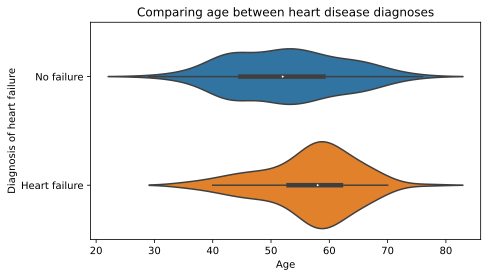

In [6]:
#@title
compare("age")

### **Sex vs heart failure diagnosis**

**Conclusion**
- Women are less likely to be diagnosed of heart failure compared to men
  - This implies a connection between sex and incidence of heart failure

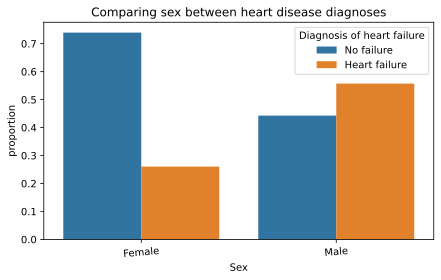

In [7]:
#@title
compare("sex",percent=True,reverse=True)

### **Type of chest pain vs heart failure diagnosis**

**Conclusion**
- In the dataset, most of the patients without chest pain symptoms had heart failure. 
  - This suggests that, at least in the dataset, chest pain is not really common in heart failure, although other symptoms may be.

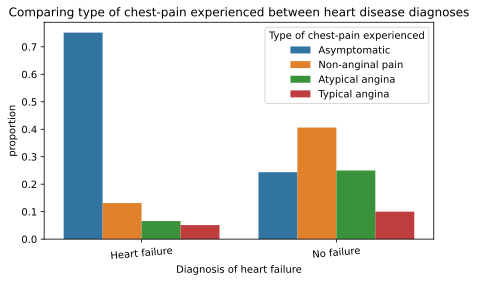

In [8]:
#@title
compare("chest_pain")

### **Maximum heart rate vs heart failure diagnosis**

**Conclusion**
- The mean maximum heart rate of patients during a stress test is higher in people without heart failure
  - This tells us that maximum heart rate can help predict heart failure. This variable could be connected to age though.

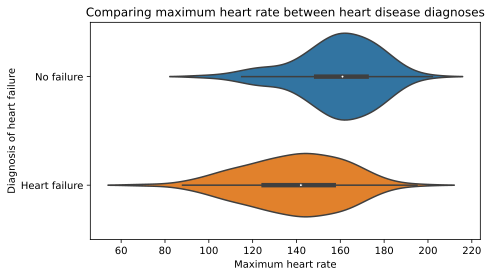

In [9]:
#@title
compare("max_heart_rate")

### **Blood pressure vs heart failure diagnosis**

**Conclusion**
- The distribution of blood pressures in people without heart failure is centered around the mean, while the distribution in people with heart failure is skewed to the right
  - The graph shows that most extreme values in resting blood pressure were measured in people with heart failure

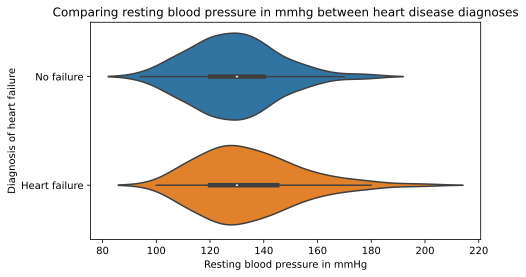

In [10]:
#@title
compare("blood_pressure")

### **Blocked vessels vs heart failure diagnosis**

**Conclusion**
- People without blocked vessels were the most likely to not have heart failure.
  - The more vessels colored by fluroscopy, the more likely it was for the patient to have heart failure

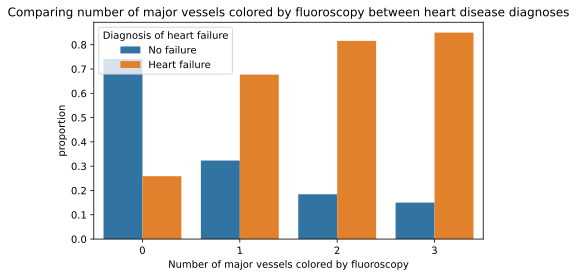

In [11]:
#@title
compare("blocked_vessels",percent=True,reverse=True)

### **Serum cholesterol vs heart failure diagnosis**

**Conclusion**
- The mean serum cholesterol in people with heart failure is slightly higher.

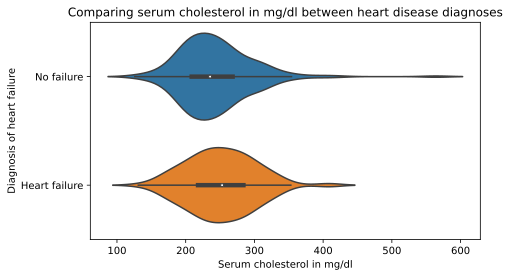

In [12]:
#@title
compare("serum_cholesterol")


## Correlations within the data

### **Relationship between cholesterol and blocked cardiac vessels**

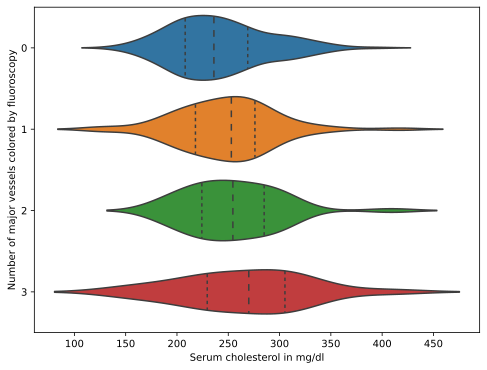

In [13]:
#@title
plt.figure(figsize=(8,6))
sns.violinplot(x  = nice["serum_cholesterol"], y = nice["blocked_vessels"],
               data = data_nice[data_nice[nice["serum_cholesterol"]] <= 430],
               order = ["0","1","2","3"],orient="h",inner="quartile")
plt.show()

**Conclusion**
- In people with more cardiac blocked vessels, the mean serum cholesterol is higher, *see below* .


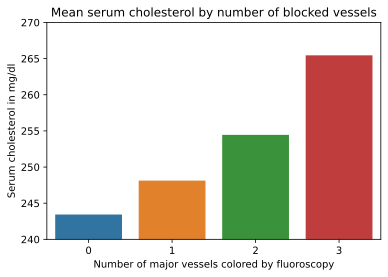

In [14]:
#@title
superdata = data_nice.groupby(nice["blocked_vessels"])[nice["serum_cholesterol"]].mean().reset_index()
sns.barplot(x=nice["blocked_vessels"], y=nice["serum_cholesterol"], data = superdata)
plt.ylim(240,270)
plt.title("Mean serum cholesterol by number of blocked vessels")
plt.show()

### **Relationship between left ventricular hypertrophy and blood pressure**

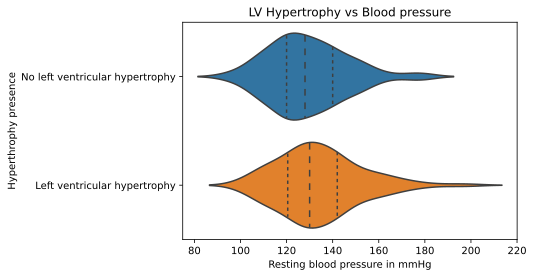

In [15]:
#@title
plt.figure()
nice["hypertrophy"] = "Hyperthrophy presence"

data_nice[nice["hypertrophy"]] = (
        data_nice[nice["rest_ecg"]]
.apply(lambda x: x if x == "Left ventricular hypertrophy" 
                   else "No left ventricular hypertrophy")
)
sns.violinplot(y = nice["hypertrophy"],x = nice["blood_pressure"],
            order=["No left ventricular hypertrophy","Left ventricular hypertrophy"],
            data = data_nice, orient="h",inner="quart")
#sns.violinplot(y=heart_disease_data.heart_disease_diagnosis,x=heart_disease_data.age)
plt.title('LV Hypertrophy vs Blood pressure')
#plt.yticks(ticks=["Normal LV","LV Hypertrophy"])
plt.show()

**Conclusion**
- Although LV Hypertrophy is known to cause a higher blood pressure, blood pressure seems to be similar between both groups.


### **Analyzing trends in resting blood pressure on different ages**

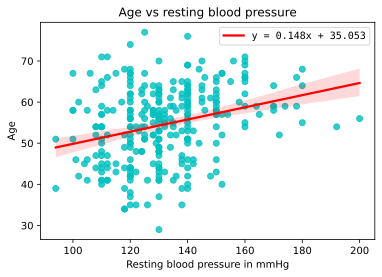

In [16]:
#@title
plt.figure()
slope, intercept, r_value, pv, se = stats.linregress(data['blood_pressure'],data['age'])
        
sns.regplot(x=nice["blood_pressure"],y=nice["age"],data=data_nice,line_kws={"color":'r',
       "label":"y = {0:.3f}x + {1:.3f}".format(slope, intercept)},color="c")
L = plt.legend()
plt.setp(L.texts, family='monospace')
plt.title("Age vs resting blood pressure")
plt.show()

**Conclusion**
- There is a weak positive correlation between age and resting blood pressure measured in patients, given by the following equation

In [17]:
#@title
print(f"Equation:\n\t y = {slope}x + {intercept}")

Equation:
	 y = 0.1479908828962227x + 35.05263500767691


- Where $y$ is in units *mmHg*  and $x$ in units  *years*

### **Analyzing trends in maximum heart rate on different ages**

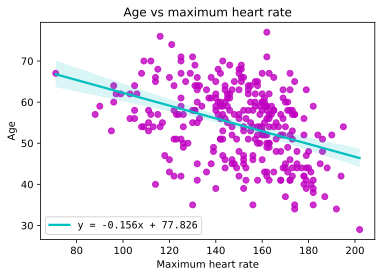

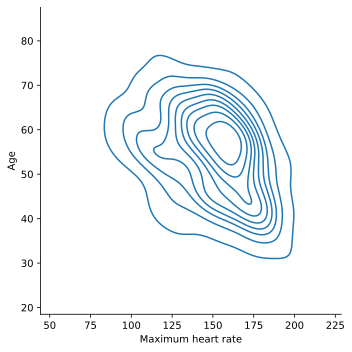

In [18]:
#@title
plt.figure()
slope, intercept, r_value, pv, se = stats.linregress(data['max_heart_rate'],data['age'])
        
sns.regplot(x=nice["max_heart_rate"],y=nice["age"],data=data_nice,line_kws={"color":'c',
       "label":"y = {0:.3f}x + {1:.3f}".format(slope, intercept)}, color='m')
       
L = plt.legend()
plt.setp(L.texts, family='monospace')
plt.title("Age vs maximum heart rate")
plt.show()

sns.displot(x=nice["max_heart_rate"],y=nice["age"],data=data_nice, kind="kde")
       

**Conclusion**
- There is a negative correlation between age and maximum heart reate measured in patients, given by the following equation


In [19]:
#@title
print(f"Equation:\n\t y = {slope}x + {intercept}")

Equation:
	 y = -0.1556428361292904x + 77.82615101703873


- Where $y$ is in units *beats per minute*  and $x$ in units  *years*